In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_size = 12
predict_size = 4

In [ ]:

# define the prediction be the % chang# for local environment
df = pd.read_pickle('working_dataset.pkl')
data = df.values.astype(float)
e of the prices
price_pct = [0]
for i in range(1, data.shape[0]):
    price_pct.append((data[i, 1] - data[i-1, 1])/data[i-1, 1])
price_pct = np.array(price_pct, dtype=float)
prices = data[:, 1].copy()
data[:, 1] = price_pct

# normalize the featres
normalized_features = MinMaxScaler().fit_transform(data[:, 2:])
train_X = np.hstack((normalized_features, np.array(price_pct).reshape(-1, 1)))
train_X = np.array([train_X[i-train_size:i, :].reshape(-1) for i in range(train_size, len(data)-predict_size)], dtype=np.float64)
train_y = np.array([price_pct[i:i+predict_size] for i in range(train_size, len(data)-predict_size)], dtype=np.float64)

train_X.shape, train_y.shape

((1526, 168), (1526, 4))

In [ ]:
# the basic linear regression model
model = LinearRegression().fit(train_X, train_y)
preds = model.predict(train_X)

for i in range(predict_size):
    print(f'R2-{i}: {r2_score(train_y[:, i], preds[:, i])}')
print()
for i in range(predict_size):
    print(f'RMSE-{i}: {mean_squared_error(train_y[:, i], preds[:, i], squared=False)}')

R2-0: 0.4187764624721021
R2-1: 0.2668522386812029
R2-2: 0.2117543433258653
R2-3: 0.16758808576416795

RMSE-0: 0.014732016299457699
RMSE-1: 0.01654847819948405
RMSE-2: 0.017164307002237048
RMSE-3: 0.017652925964541988


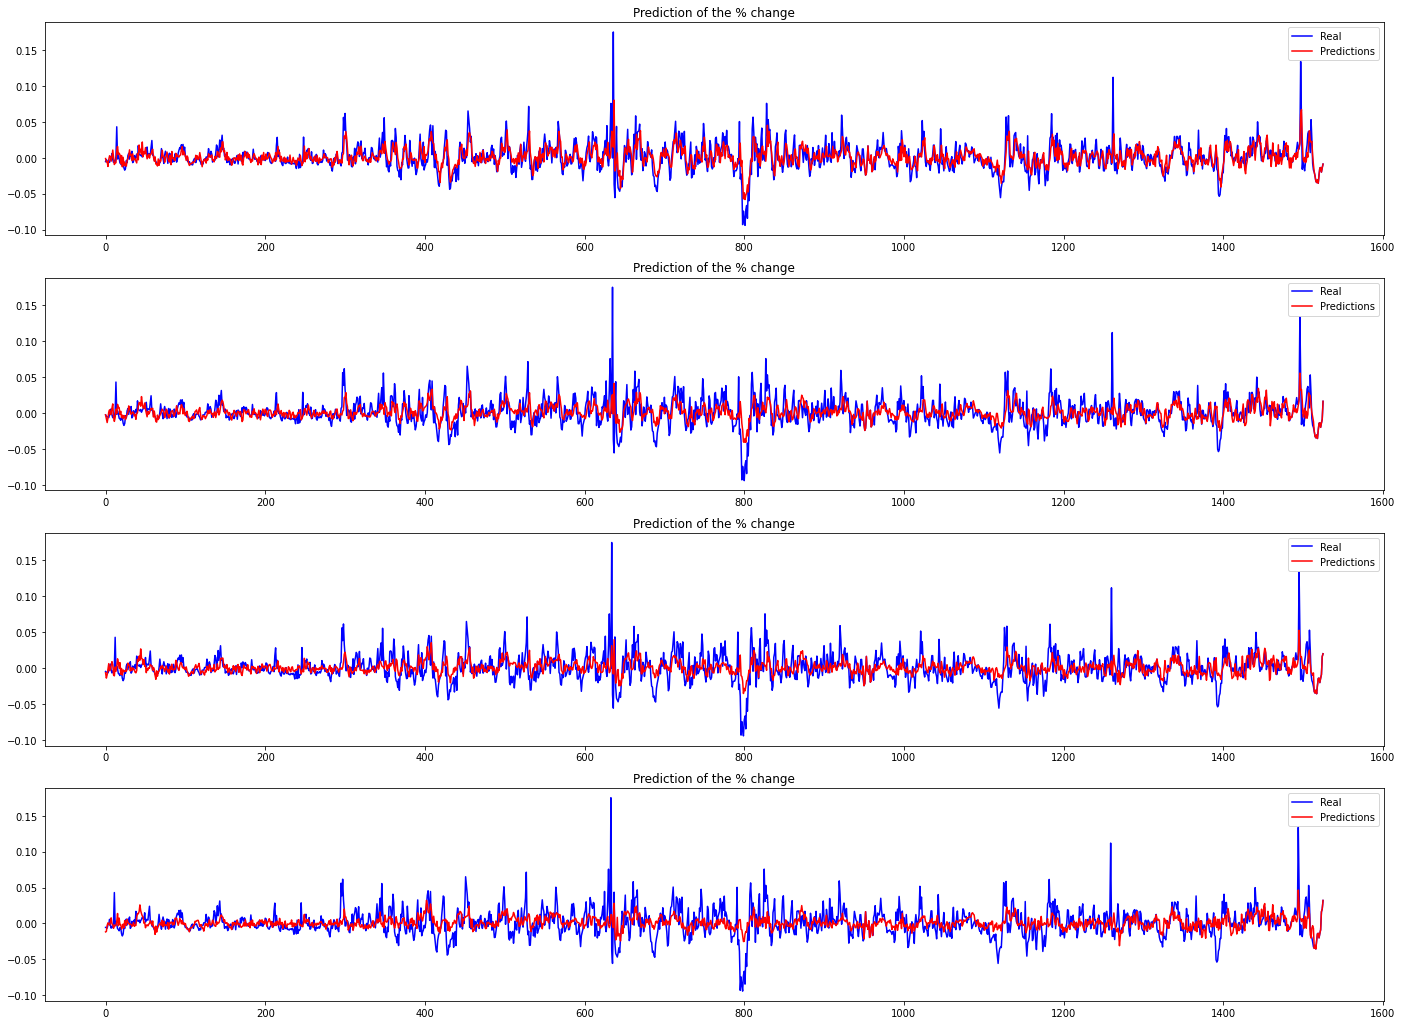

In [ ]:
plt.figure(figsize=(24, 18))
for i in range(predict_size):
    plt.subplot(predict_size, 1, i+1)
    plt.plot(range(len(data)-predict_size-train_size), train_y[:, i], color='blue', label='Real')
    plt.plot(range(len(data)-predict_size-train_size), preds[:, i], color='red', label='Predictions')
    plt.legend()
    plt.title('Prediction of the % change')
plt.show()

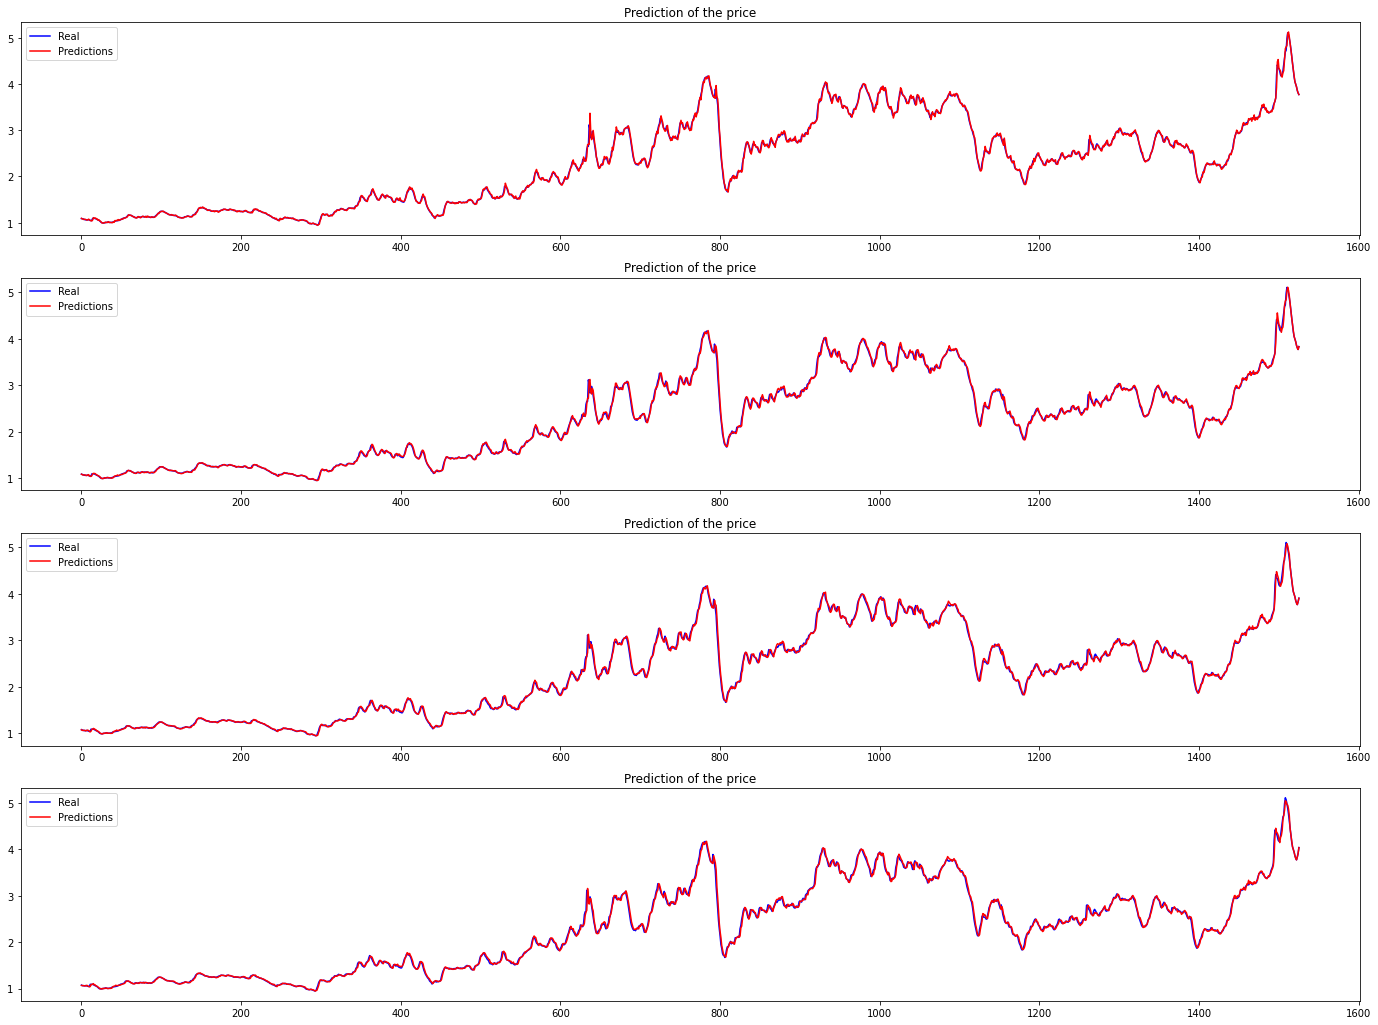

In [ ]:
predicted_price_transpose = np.array([prices[11+i:-5+i] * (preds[:, i]+1) for i in range(predict_size)], dtype=np.float64)
prices_transpose = np.array([prices[12+i:-4+i] for i in range(predict_size)], dtype=np.float64)

plt.figure(figsize=(24, 18))
for i in range(predict_size):
    plt.subplot(predict_size, 1, i+1)
    plt.plot(range(len(data)-predict_size-train_size), prices_transpose[i], color='blue', label='Real')
    plt.plot(range(len(data)-predict_size-train_size), predicted_price_transpose[i], color='red', label='Predictions')
    plt.legend()
    plt.title('Prediction of the price')
plt.show()